In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
n = 1000
ni = 5
b0 = 5
b1 = 2

In [36]:
ns = np.linspace(100, 100000, 1000)
nis = np.linspace(0.01,100,1000)

In [3]:
def prosta_regresji(x,y):
    b_1 = np.sum(x*(y-np.mean(y)))/np.sum((x-np.mean(x))**2)
    b_0 = np.mean(y) - b_1 * np.mean(x)
    return b_0, b_1

In [45]:
xs = [np.linspace(0,10,int(n_)) for n_ in ns]

In [4]:
x = np.linspace(0,10,1000)

In [5]:
bledy = stats.t.rvs(ni, loc=0, scale=1, size=n)

In [46]:
bledy_rozne_ni = [stats.t.rvs(ni_, loc=0, scale=1, size=n) for ni_ in nis]
bledy_rozne_n = [stats.t.rvs(ni, loc=0, scale=1, size=int(n_)) for n_ in ns]

In [47]:
ys_rozne_ni = [b0 + b1 * xs + blad for blad in bledy_rozne_ni]
ys_rozne_n = [b0 + b1 * xs + blad for blad in bledy_rozne_n]

TypeError: unsupported operand type(s) for +: 'int' and 'list'

In [6]:
y = b0 + b1 * x + bledy
b0_e, b1_e = prosta_regresji(x, y)

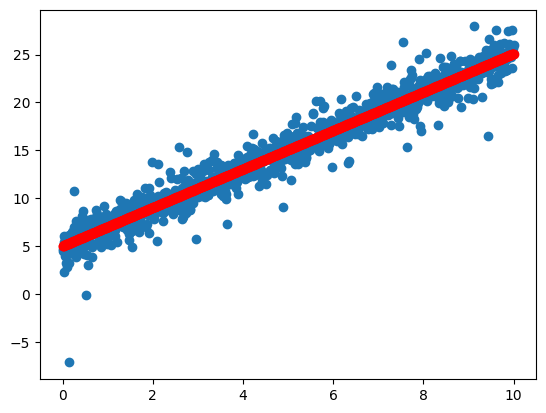

In [7]:
plt.scatter(x,y)
plt.scatter(x, b1_e * x + b0_e, color="r")
plt.show()

In [9]:
def b1_estim(x,y):
    return np.sum((x - np.mean(x)) * (y))/np.sum((x-np.mean(x))**2)

In [10]:
def b0_estim(x,y):
    return np.mean(y) - b1_estim(x,y) * np.mean(x)

In [11]:
print(b1_estim(x,y), b0_estim(x,y))

2.0107729657213054 4.9951913639820695


In [20]:
def mean_estim(x):
    return 1/len(x) * np.sum(x)

In [21]:
def variance_estim(x):
    return 1/(len(x) + 1) * np.sum(x**2)

In [12]:
mc = 1000
def estymacja_mc(mc, n, ni, b0, b1):
    bledy = [stats.t.rvs(ni, loc=0, scale=1, size=n) for i in range(mc)]
    ys = [b0 + b1 * x + blad for blad in bledy]
    b0_e, b1_e = [b0_estim(x,y_) for y_ in ys], [b1_estim(x,y_) for y_ in ys]
    return b0_e, b1_e

In [13]:
b0_e, b1_e = estymacja_mc(mc, n, ni, b0, b1)

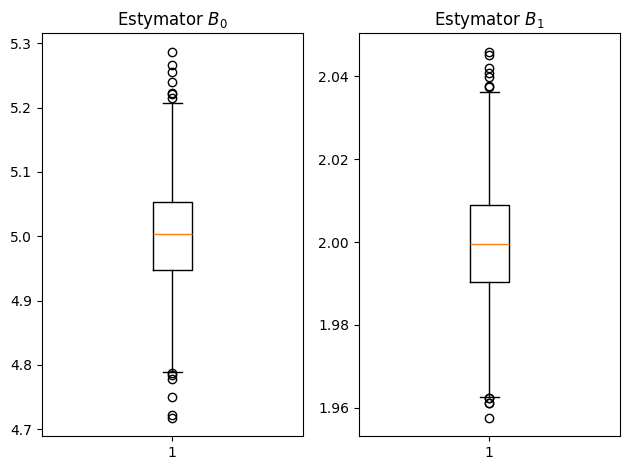

In [18]:
fig, axis = plt.subplots(1,2)

axis[0].boxplot(b0_e)
axis[0].set_title("Estymator $B_0$")

axis[1].boxplot(b1_e)
axis[1].set_title("Estymator $B_1$")
plt.tight_layout()
plt.show()

Zadanie 2